Возьмем распределение Парето. Функция этого распределения:  $1 - (\frac{x_m}{x})^k$, где $x_m$ - это коэффициент масштаба. Часто его принимают за единицу, т к по сути он характеризует шкалу измерения. 
Плотность вероятности распределния Парето определяется формулой $\frac{kx_m^k}{x^{k+1}}$. Последнюю можно упростить до $\frac{b}{x^{k+1}}$, где b - это коэффициент, который задает форму функции.
Математическое ожидание распределения Парето можно определить по формуле: $\frac{kx_m}{k-1}$.
Дисперсия: $(\frac{x_m}{K-1})^2*\frac{k}{k-2}$. Как видно из формулы, дисперсия определена при K>2.
### Зачем распределение Парето нужно в жизни:
Без него - никуда в анализе промышленных процессов. Например, автомат, который делает проволоку, может периодически создавать трещины на некоторых участках этой проволоки. В этом случае распределение Парето отлично подойдет для моделирования длины проволоки между поврежденными точками.



#### Посчитаем теоретические мат. ожидание и дисперсию при $x_m$ = 1 и k = 3:

In [115]:
x_m = 1
k = 3

EX = k*x_m/(k-1)
DX = ((x_m/(k-1))**2)*k/(k-2)
print("EX =", round(EX, 2))
print("DX =", round(DX, 2))

EX = 1.5
DX = 0.75


#### Сгенерируем выборку объёма 1000 и сравним гистограмму выборки и с теоретической плотностью распределения случайной величины.

In [125]:
#импортируем все необходимые библиотеки
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
%matplotlib inline



In [126]:
# Сгенерируем выборку объема 1000 из этого распределения. Параметр b = 3 (K*x_m)
prt = sts.pareto(k*x_m)
sample = prt.rvs(1000)
x = np.linspace(1.001, 5, 10000) #зададим область определения функции, которая определена при х>1

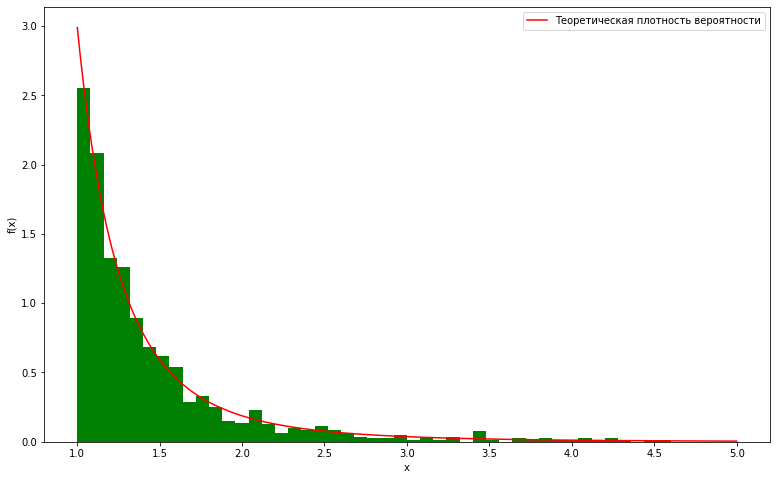

In [118]:
# теперь можно построить гистограмму нашей выборки и наложить на нее график теоретической плотности вероятности
prob_density = prt.pdf(x) #определяем плотность вероятности
plt.figure(figsize = (13,8))
plt.hist(sample, bins = 50, range = (1, 5), color = 'green', density = True,) #рисуем гистограмму выборки
plt.plot(x, prob_density, 'r', label = "Теоретическая плотность вероятности") # и график плотности вероятности
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Оценим распределение выборочного среднего при разных объемах выборок

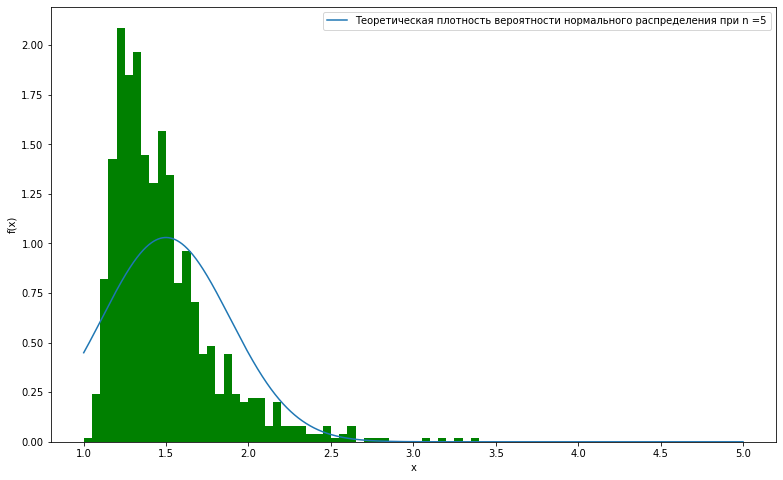

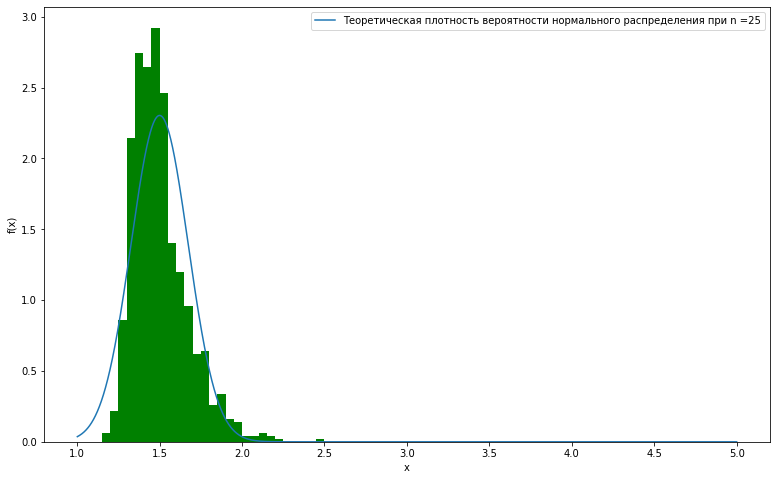

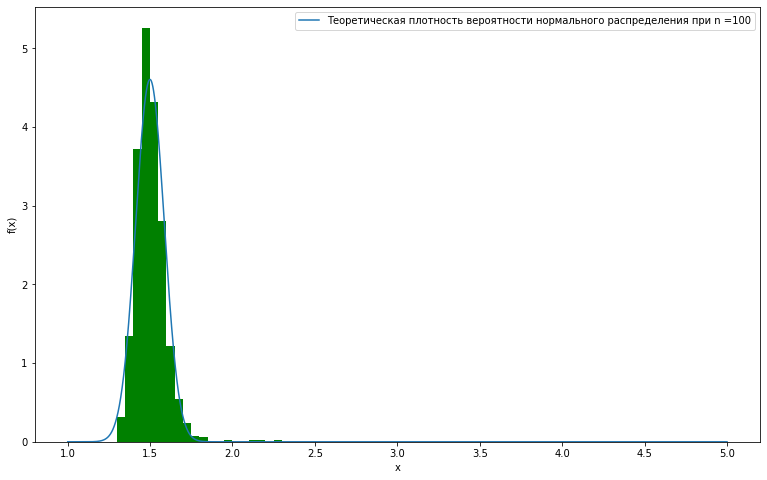

In [124]:
for n in [5, 25, 100]:
    plt.figure(figsize = (13,8))
    i = 1
    means = [] #список, в который будем добавлять средние по каждой выборке
    while i < 1000:
        value = prt.rvs(n).mean() #определяем среднее значение для каждой из выборок
        means.append(value) #добавляем его в список со всеми средними
        i += 1
    
    plt.hist(means, bins = 80, range = (1, 5), color = 'green', density = True) # строим гистограмму со всеми средними
    #вычисляеем теоретическую плотностость вероятности нормального распределения с данными параметрами:
    norm_rv = sts.norm(EX, np.sqrt(DX/n))
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Теоретическая плотность вероятности нормального распределения при n ={}'.format(n))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()    

### Вывод:

Чем больше объем выборки, тем лучше теоретическое значение среднего приближается к значениям, полученным после большого количества экспериментов. Следовательно, центральная предельная теорема действительно работает, и мы можем делать выводы о генеральной совокупности, основываясь на показателях выборки из нее. При этом чем больше объем каждой выборки, тем меньше разброс данных (меньше стандартная ошибка). То есть наш эксперимент также подтверждает, что формула $SE=\frac{Sd}{\sqrt{n}}$ действительно работает.